In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r"C:\Users\radhe\OneDrive\Desktop\Corizo\Project 1 - Cardiovascular Disease Prediction using Machine Learing\cardio_train.csv\cardio_train.csv",sep = ';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='ap_hi', ylabel='ap_lo'>

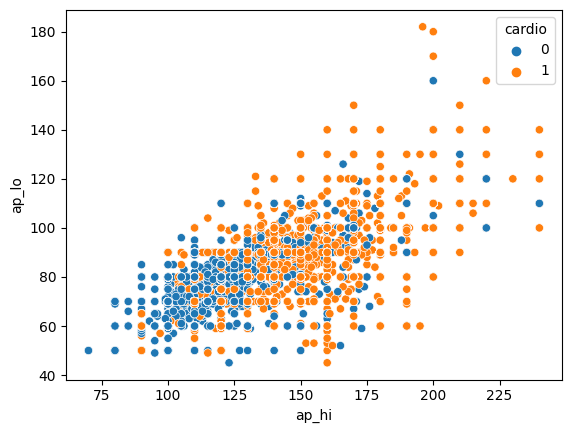

In [5]:
df.gender = df.gender.apply(lambda x : x - 1)
df.age = df.age.apply(lambda x : round(x/365))
df = df.drop(df[df.age <= 35].index)
df = df.drop(df[df.ap_hi >= 300].index)
df = df.drop(df[df.ap_lo >= 300].index)
df = df.drop(df[df.ap_hi <= 40].index)
df = df.drop(df[df.ap_lo <= 40].index)
df = df.drop(df[df.ap_hi <= df.ap_lo].index)
df = df.drop(df[(df.height < 140) | (df.height > 200)].index)
df = df.drop(df[(df.weight < 40) | (df.weight > 160)].index)
df["bmi"] = df.weight / ((df.height/100)**2)

sns.scatterplot(x = "ap_hi", y = "ap_lo", hue = "cardio", data = df)

<Axes: xlabel='height', ylabel='weight'>

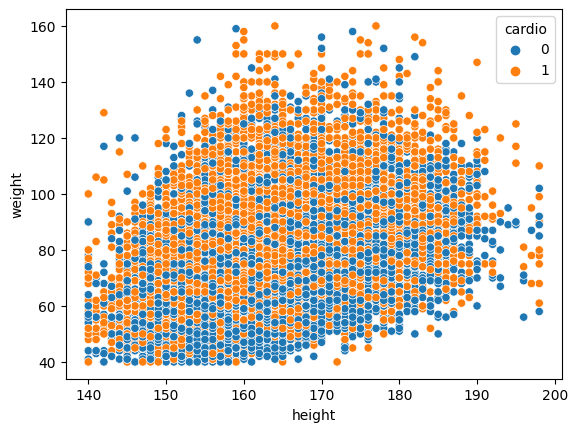

In [6]:
sns.scatterplot(x = "height", y = "weight", hue = "cardio", data = df)

df.describe()

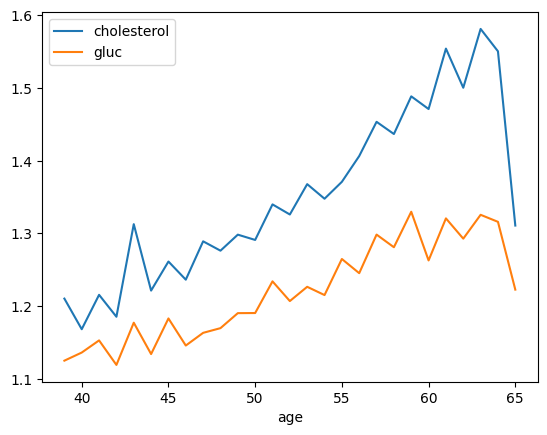

In [8]:
df.groupby(by = 'age')["cholesterol"].mean().plot()
df.groupby(by = 'age')["gluc"].mean().plot()
plt.legend()

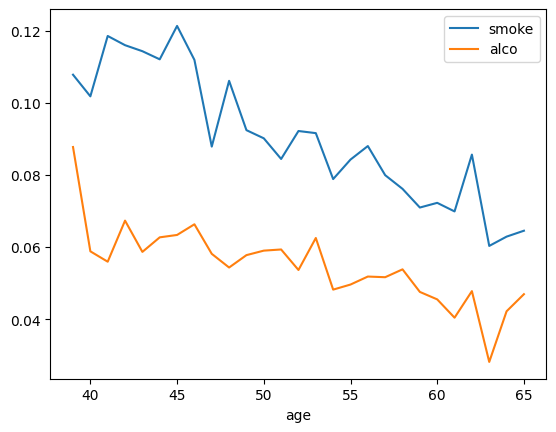

In [9]:
df.groupby(by = 'age')["smoke"].mean().plot()
df.groupby(by = 'age')["alco"].mean().plot()
plt.legend()

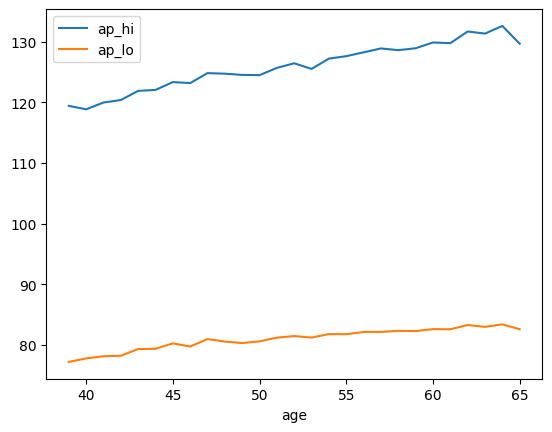

In [10]:
df.groupby(by = 'age')["ap_hi"].mean().plot()
df.groupby(by = 'age')["ap_lo"].mean().plot()
plt.legend()

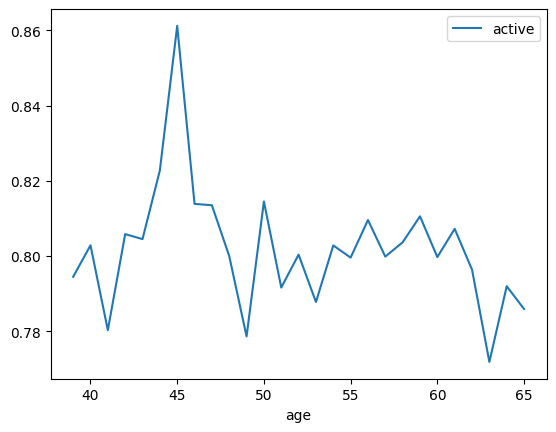

In [11]:
df.groupby(by = 'age')["active"].mean().plot()
plt.legend()

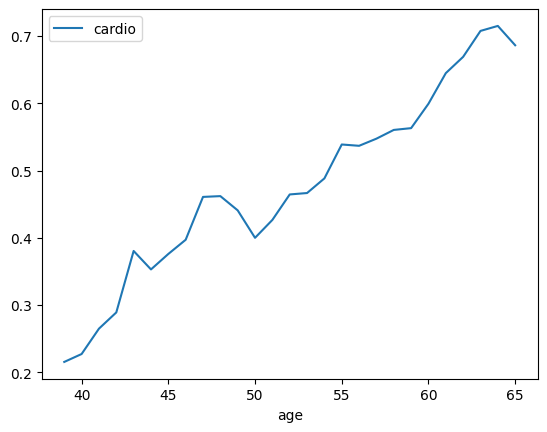

In [12]:
df.groupby(by = 'age')["cardio"].mean().plot()
plt.legend()

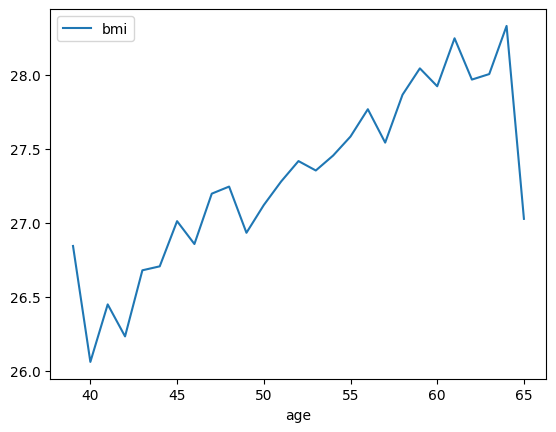

In [13]:
df.groupby(by = 'age')["bmi"].mean().plot()
plt.legend()

<Axes: >

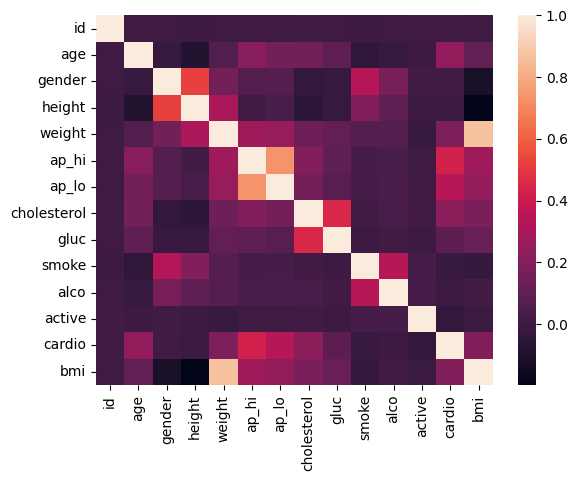

In [14]:
sns.heatmap(df.corr())

In [15]:
def bmicalc(bmi):
    if(bmi < 18.5):
        return 1
    elif(bmi < 25):
        return 2
    elif(bmi < 30):
        return 3
    elif(bmi < 35):
        return 4
    elif(bmi < 40):
        return 5
    else:
        return 6

def mapcalc(h,l):
    return(h + 2*l)/3

def mapclass(mean_ap):
    if(mean_ap < 70):
        return 1
    elif(mean_ap < 80):
        return 2
    elif(mean_ap < 90):
        return 3
    elif(mean_ap < 100):
        return 4
    elif(mean_ap < 110):
        return 5
    elif(mean_ap < 120):
        return 6
    else:
        return 7
def ageclass(age):
    if(age < 40):
        return 1
    elif(age < 45):
        return 2
    elif(age < 50):
        return 3
    elif(age < 55):
        return 4
    elif(age < 60):
        return 5
    elif(age < 65):
        return 6
    else:
        return 7

df["bmi_class"] = df.bmi.apply(lambda bmi: bmicalc(bmi))
df["mean_arterial_pressure"] = df.apply(lambda p: mapcalc(p["ap_hi"],p["ap_lo"]), axis = 1)
df["map_class"] = df.mean_arterial_pressure.apply(lambda mean_ap: mapclass(mean_ap))
df["age_class"] = df.age.apply(lambda age: ageclass(age))

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class,mean_arterial_pressure,map_class,age_class
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120,2,90.000000,4,4
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679,4,106.666667,5,5
2,2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.507805,2,90.000000,4,4
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479,3,116.666667,6,3
4,4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.011177,2,73.333333,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,1,168,76.0,120,80,1,1,1,0,1,0,26.927438,3,93.333333,4,4
69996,99995,62,0,158,126.0,140,90,2,2,0,0,1,1,50.472681,6,106.666667,5,6
69997,99996,52,1,183,105.0,180,90,3,1,0,1,0,1,31.353579,4,120.000000,7,4
69998,99998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.099251,3,98.333333,4,6


In [16]:
x = df.drop(["id", "age", "height", "weight", "ap_hi", "ap_lo", "cardio", "bmi", "mean_arterial_pressure"], axis = 1)
y = df.cardio

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [17]:
linear = LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_test, y_test)

0.20233077049925086

In [18]:
log = LogisticRegression()
log.fit(x_train, y_train)
log.score(x_test, y_test)

0.7113108285839544

In [19]:
tre = tree.DecisionTreeClassifier()
tre.fit(x_train, y_train)
tre.score(x_test, y_test)

0.7059038433435628

In [20]:
svmodel = SVC()
svmodel.fit(x_train, y_train)

SVC()

In [21]:
svmodel.score(x_test, y_test)

0.7196405085488821

In [22]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.711968434896975

In [23]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb.score(x_test, y_test)

0.5215548735934532

In [24]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb.score(x_test, y_test)

0.60507087534707

In [25]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test)

0.6857372497442642

In [26]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6755808855765015